In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("wine.csv")

In [3]:
df.shape

(178, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [6]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [7]:
df["Customer_Segment"].unique()


array([1, 2, 3], dtype=int64)

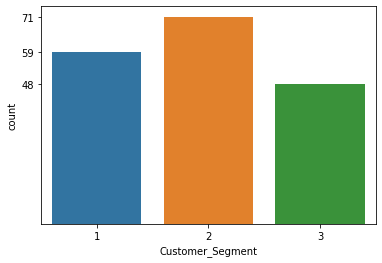

In [8]:
#we have target /output : Customer_Segment  which want to predict
#How many category in Customer_Segment 
#visualize Customer_Segment
sns.countplot(data=df,x="Customer_Segment")
c=df["Customer_Segment"].value_counts()
plt.yticks(c)
plt.show()

In [9]:
#Separate X input and Y output from dataset df
X=df.drop("Customer_Segment",axis=1)
Y=df["Customer_Segment"]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [13]:
#Feature extraction technique (PCA) : Principal Component analysis
#1. Standardization
#inbuilt class StandardScaler  use formula Z-score = (Xi-mean of(X))/std(X)

from sklearn.preprocessing import StandardScaler

In [16]:
#fit_transform on training data X_train and transform on testing_data means X_test :
#create object of StandardScaler class
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)
print("After scaling training data : ")
print(X_train)
print("After scaling testing data : ")
print(X_test)

After scaling training data : 
[[-1.10453814 -0.53090202 -0.13625741 ...  0.51645351 -0.4182397
  -0.8519466 ]
 [-0.60884898 -0.79223988 -0.57322083 ...  0.85655034  0.07607378
   0.73976188]
 [ 1.17054803 -0.47189024  1.61159627 ...  1.23915929  1.13335541
   0.66313697]
 ...
 [ 0.68756884 -0.67421633 -0.42756636 ...  0.09133246  0.28203774
  -0.87981021]
 [-0.02418996  0.29526283  1.24746009 ... -0.80142174 -0.36331598
  -0.43399251]
 [ 0.12832978 -0.68264658  0.70125581 ...  0.68650193 -0.08869738
   1.3248976 ]]
After scaling testing data : 
[[ 0.94176842  0.67462425  0.66484219  0.09638535  0.66003794 -0.6493993
  -1.39119415  1.09918838 -1.26802979  0.38990328  0.00630825 -1.03613156
  -0.15535646]
 [-0.67239887 -0.7163676  -0.60963445  0.88062311  0.73519378 -0.3776237
   0.14995588 -0.23626156  0.1085473  -1.21734921  0.4314293   0.52919448
  -1.32214495]
 [ 0.87821852  0.53974019  0.73766943 -1.40935114  1.33644046  0.74145233
   1.09680622 -1.65517712  0.19352119  0.06172083 

In [17]:
#Apply PCA
from sklearn.decomposition import PCA


In [18]:
#Create object of PCA class
pc=PCA(n_components=None,random_state=1)  
#n_components  inbuilt parameters ,here  pass no. of components means PC here total input 13 features
#input features

In [19]:
X_train_pc=pc.fit_transform(X_train) #for training
X_test_pc=pc.transform(X_test) #for testing

In [20]:
explain_variance=pc.explained_variance_ratio_
print(explain_variance) #automatic arrange variance in descending order

[0.35168281 0.19739103 0.11318949 0.07729222 0.06125164 0.05129145
 0.04229866 0.02624925 0.02426134 0.01824268 0.01580332 0.01324335
 0.00780277]


In [21]:
#Create object of PCA class
pc1=PCA(n_components=2,random_state=1)  
#n_components  inbuilt parameters ,here  pass no. of components =2 means PC here total input 13 features
#input features

In [22]:
X_train_pc1=pc1.fit_transform(X_train) #for training
X_test_pc1=pc1.transform(X_test) #for testing

In [23]:
explain_variance=pc1.explained_variance_ratio_
print(explain_variance) #automatic arrange variancexplain_variance=pc1.explained_variance_ratio_
print(explain_variance) #automatic arrange variance in descending ordere in descending order

[0.35168281 0.19739103]
[0.35168281 0.19739103]


In [24]:
X_train_pc1

array([[ 0.95748971,  2.17579819],
       [-2.55013055, -1.09031172],
       [-2.32213284, -1.14232714],
       [-1.39659962,  1.40055044],
       [ 2.88922419, -0.10928569],
       [-2.59147207,  1.7259757 ],
       [ 0.10179039,  0.74634603],
       [-1.93544012, -2.07815596],
       [ 2.88140885, -1.20498819],
       [ 0.09058153,  2.65370284],
       [ 2.96437173,  0.50462603],
       [-3.55535676, -1.56919151],
       [-0.0239897 ,  2.15555787],
       [-1.22540936, -2.07333402],
       [-1.1665625 ,  2.20166638],
       [-1.52974106, -1.04134747],
       [ 3.53032658, -0.38641899],
       [ 2.43739324, -2.40183577],
       [ 2.17692392, -1.96642054],
       [ 2.72763364, -2.6090008 ],
       [ 2.06786209,  1.55631109],
       [ 0.48691891,  2.41775015],
       [-1.30643481, -0.48402511],
       [ 3.27981637, -1.83555644],
       [-2.64344105, -1.46884449],
       [ 1.33444043,  0.77303205],
       [ 2.44512858, -0.57746731],
       [-2.54518425, -1.61133618],
       [-1.11439927,

In [25]:
#BaseLine Model Logistic regression because we have  classification type dataset
#classification algorithm 
#use logistic regression algorithm
from sklearn.linear_model import LogisticRegression

#create the object of LogisticRegression
lr=LogisticRegression()

In [26]:
#Train the model then inbuilt function fit() of LogisticRegression class
lr.fit(X_train_pc1,Y_train)   #same as linearregression


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
#test the model
Y_pred=lr.predict(X_test_pc1)

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(Y_test,Y_pred))

print("Confusion Matrix : ")
#Confusion matrix
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       1.00      0.95      0.97        19
           3       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

Confusion Matrix : 
[[23  0  0]
 [ 1 18  0]
 [ 0  0 12]]


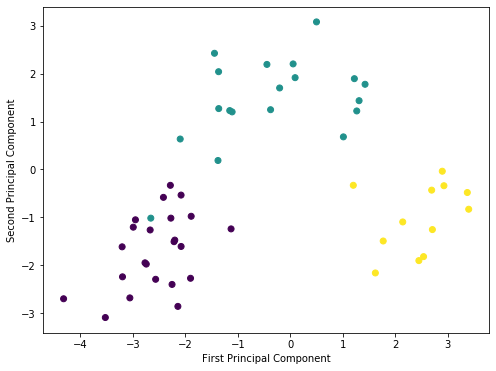

In [29]:
# giving a scatter plot
plt.figure(figsize =(8, 6))
y=Y_test
X1=X_test_pc1[:, 0]
X2=X_test_pc1[:, 1]
plt.scatter(X1,X2,c=y)#c means color

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()